In [3]:
import emcee
import dlsfunctions as dls
import numpy as np
import matplotlib.pyplot as plt
import initialization_data as init

In [4]:
d = init.get_distance()
time = init.get_time()
gamma = init.get_gamma()

mean = init.get_central_mean()
sigma = init.get_real_wide_sigma()

c = init.c
m = init.m
beta = init.beta

f = dls.generate_distribution(d, mean, sigma, c)

theta_input = np.append(f, beta)
sim_data = dls.g2(theta_input, d, m, gamma, time)

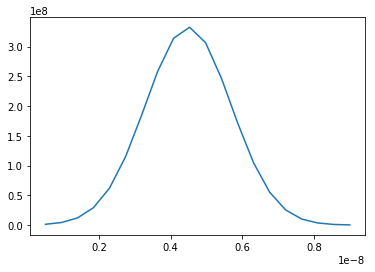

In [5]:
plt.plot(d, f)

In [7]:
ndim = 21
nwalkers = 100
nsteps = 1000

In [8]:
start_pos = dls.create_start_pos(theta_input, ndim, nwalkers)

In [9]:
sampler = dls.create_sampler(nwalkers, ndim, d, sim_data, m, gamma, time)

In [10]:
result = dls.infer(sampler, start_pos, nsteps)
result.acceptance_fraction

array([0.396, 0.397, 0.409, 0.391, 0.394, 0.383, 0.339, 0.396, 0.384,
       0.401, 0.368, 0.386, 0.383, 0.394, 0.374, 0.371, 0.396, 0.39 ,
       0.381, 0.382, 0.373, 0.391, 0.392, 0.371, 0.391, 0.364, 0.366,
       0.396, 0.375, 0.387, 0.35 , 0.368, 0.383, 0.363, 0.386, 0.369,
       0.364, 0.369, 0.403, 0.373, 0.391, 0.388, 0.358, 0.339, 0.398,
       0.376, 0.379, 0.384, 0.382, 0.398, 0.397, 0.369, 0.395, 0.394,
       0.376, 0.376, 0.397, 0.381, 0.373, 0.374, 0.379, 0.384, 0.404,
       0.411, 0.361, 0.392, 0.394, 0.369, 0.384, 0.411, 0.395, 0.412,
       0.389, 0.347, 0.399, 0.385, 0.364, 0.356, 0.36 , 0.395, 0.399,
       0.383, 0.365, 0.384, 0.399, 0.372, 0.392, 0.4  , 0.374, 0.386,
       0.37 , 0.355, 0.403, 0.389, 0.372, 0.386, 0.402, 0.367, 0.377,
       0.374])

/usr/local/lib/python2.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


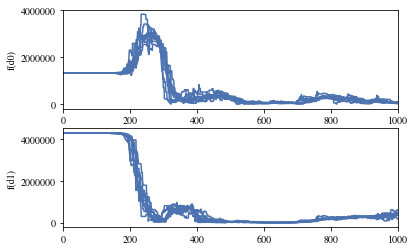

In [11]:
dls.view_burnin_plot(result, 0, 1)

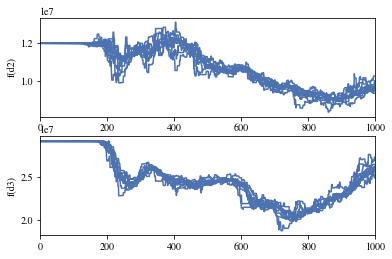

In [12]:
dls.view_burnin_plot(result, 2, 3)

In [13]:
chained_samples = dls.chain(result, 850, ndim)

In [15]:
samples_df = dls.create_dataframe(chained_samples, ndim)
q = samples_df.quantile([0.5], axis=0)
q

,f0,f1,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f2,f3,f4,f5,f6,f7,f8,f9
0.5,96687.208659,297554.898535,3.097411e+08,2.500204e+08,1.803829e+08,1.141251e+08,5.331433e+07,2.264877e+07,1.783482e+07,150643.079707,157238.982406,955015.739791,9.234661e+06,2.375018e+07,7.140811e+07,1.234991e+08,1.877285e+08,2.571090e+08,3.122767e+08,3.246708e+08


In [16]:
infer = np.zeros(20)
infer[0] = 96687.208659
infer[1] = 297554.898535
infer[2] = 9.234661e+06
infer[3] = 2.375018e+07
infer[4] = 7.140811e+07
infer[5] = 1.234991e+08
infer[6] = 1.877285e+08
infer[7] = 2.571090e+08
infer[8] = 3.122767e+08
infer[9] = 3.246708e+08
infer[10] = 3.097411e+08
infer[11] = 2.500204e+08
infer[12] = 1.803829e+08
infer[13] = 1.141251e+08
infer[14] = 5.331433e+07
infer[15] = 2.264877e+07
infer[16] = 1.783482e+07
infer[17] = 150643.079707
infer[18] = 157238.982406
infer[19] = 955015.739791

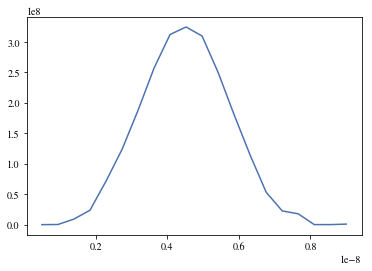

In [17]:
plt.plot(d, infer)

In [18]:
betadf = dls.get_beta(chained_samples, ndim)

In [19]:
beta_infer = betadf.quantile([0.5], axis=0)
beta_infer

,beta
0.5,0.83248


In [20]:
theta_infer = np.append(infer, beta_infer)

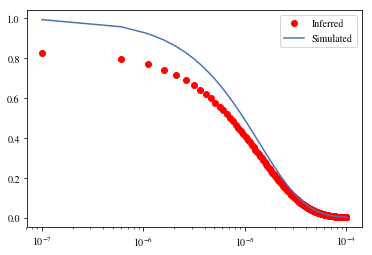

In [21]:
inferg2 = dls.g2(theta_infer, d, m, gamma, time)
plt.semilogx(time, inferg2, 'ro', label='Inferred')
plt.semilogx(time, sim_data, label='Simulated')
plt.legend()